In [175]:
# MULTIPLE LINEAR REGRESSION

In [176]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
# Read the csv file
# Finding shape of the file 
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df.shape

(1436, 11)

In [178]:
# Sample of the dataframe
df.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [179]:
# There are no missing values hence no need of cleaning
# All datatypes are consistent except Fuel_Type variable.We use one hot encoding to make it suitable to feed the mlr model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [180]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [181]:
# Checking the cylinder variable for different unique values
uniquecyl=df['Cylinders'].unique()
uniquecyl

array([4], dtype=int64)

In [182]:
#We can drop the column Cylinders since all cars have 4 cylinders
df=df.drop(['Cylinders'],axis='columns')

In [183]:
# Performing one hot encoding on the Fuel_Type variable using get_dummies method
ohe=pd.get_dummies(df['Fuel_Type'],dtype=int)
ohe

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [184]:
df2=pd.concat([df,ohe],axis='columns')

In [185]:
df2=df2.drop(['Fuel_Type'],axis='columns')

In [186]:
df2.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0


In [187]:
# Data Visualization

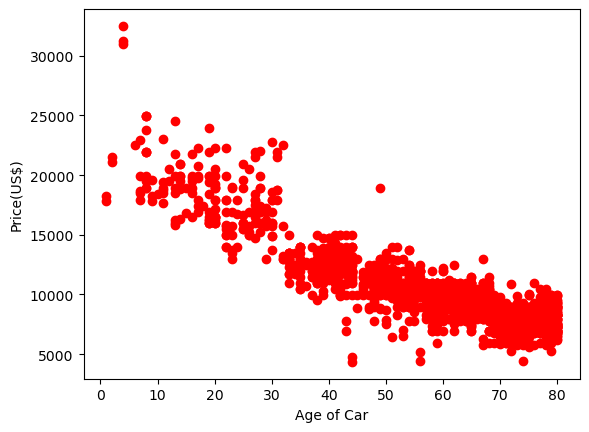

In [188]:
# Price vs Age
plt.xlabel('Age of Car')
plt.ylabel('Price(US$)')
plt.scatter(df.Age_08_04,df.Price, color='red')

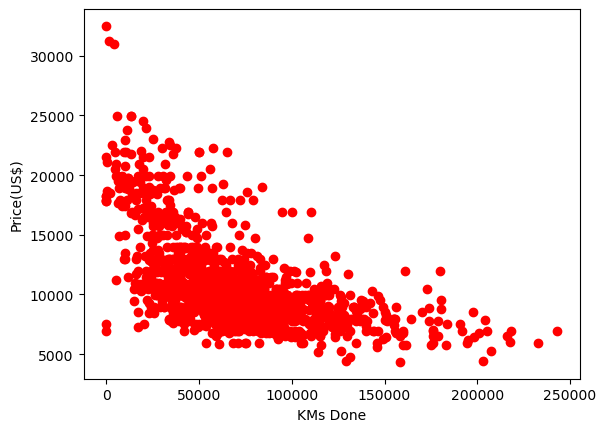

In [189]:
# Price vs KM
plt.xlabel('KMs Done')
plt.ylabel('Price(US$)')
plt.scatter(df.KM,df.Price, color='red')

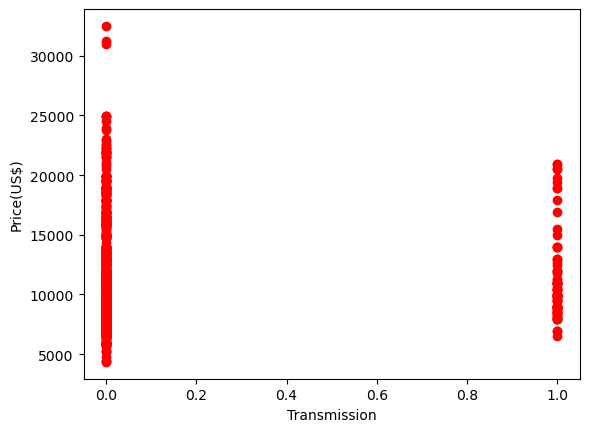

In [190]:
# Price vs Transmission
plt.xlabel('Transmission')
plt.ylabel('Price(US$)')
plt.scatter(df.Automatic,df.Price, color='red')

<Axes: >

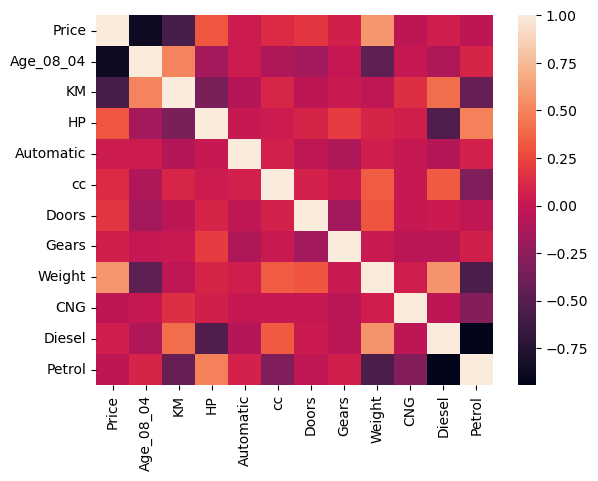

In [191]:
# Builing Correlation Matrix
# Finding Correlation between different dependent and independent variables
sns.heatmap(df2.corr())

In [192]:
# Building the model

In [193]:
X=df2[['Age_08_04','KM','HP', 'Automatic' ,'cc' ,'Doors','Gears','Weight','CNG','Diesel', 'Petrol']]
y=df2['Price']

In [194]:
# Model 1
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [195]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [196]:
# Predicting Test set results
y_pred=regressor.predict(X_test)
print(y_pred)

[11137.15453645  8974.9731327   9283.27025955  8951.97440751
 10082.31592852  7959.3269862   8656.43768303  8254.87283979
 14063.40319186 13099.95735642  9551.42647033  9325.01973397
 12919.13152502 12925.08574757  9793.37148737  8305.77313577
 12190.02678644 17535.47631867  7469.10553333  9146.75133486
 12638.29998775 17804.25328461  7903.43441681 10386.01442865
  7580.43295913 16058.83988677 10034.10324597  7412.37291567
 15766.17628452 14440.45886039  8163.90729602  9609.36755541
  8509.88035778 10098.71270421 10245.63943307  8073.58357557
  8759.24335824  9965.93592783 16471.77872927  9624.35819079
  9829.937657    9503.46762021  7888.13705539  5698.36965348
  6870.22880548 17266.12085347  9441.28892372 10702.0580487
  8748.50876678 13429.13420122 12940.89346452  6393.20092254
 15071.98364029 16374.4739198   6194.47032501  7783.01004642
 10250.60750962 10892.73156479 16161.77461917 18896.4137361
 12700.82225076  7935.85833552  7924.15312986 11012.48786554
 13355.82051501  8971.4831

In [197]:
# Calculating the Coefficient 
print(regressor.coef_)

[-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  5.51600710e+02  2.58849583e+01
 -4.34086718e+02 -5.02635474e+02  9.36722192e+02]


In [198]:
# Calculating the Intercept
print(regressor.intercept_)

-13821.299275879468


In [199]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8348888040611082

In [200]:
# Model 2
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2,random_state=0)

In [201]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

LinearRegression()

In [202]:
# Predicting Test set results
y_pred2=regressor.predict(X_test2)
print(y_pred2)

[  8200.66884294  10429.06557387  12851.74363467   7634.79959584
  10471.33812683   9480.95224838   6017.90300419  16140.9877093
  11202.75612439  10538.60953871   6882.27907252  11229.5184558
  11727.10605384   9713.97772851   7470.08720203  16041.14521913
  11106.24342562   7589.1543205   12839.06798605   8843.36727239
   6798.7648939    6189.19582865  11568.55494579  10847.72132939
  18859.27640073   7702.54607794  13931.70856654   5683.05661954
   9191.19607473   7838.84492591  10405.53406327   7683.79779077
  16133.71640386   7268.52917737  11046.54967591  12880.75481711
   9525.70859366  12235.21306023   9876.85600557   9007.97474159
   8905.76990811  10554.50393526   9667.52669876  17099.53252085
  11061.99408088   7085.78872947   9635.99509574   7677.73869455
   8399.41160757   8688.0224917   19137.91689785   8435.95574213
   7221.14585709   6593.94670534  11333.88740437  18026.36983933
  14135.17890526  10043.04900075  19384.6438411   11065.66902562
   6597.12110285   7865.857

In [203]:
# Calculating the Coefficient 
print(regressor.coef_)

[-1.22334618e+02 -1.72112550e-02  5.98281166e+01  3.33659306e+02
 -4.17721833e+00  8.99928497e+00  4.75916623e+02  1.95677985e+01
 -1.71297391e+03  2.14828791e+03 -4.35314001e+02]


In [204]:
# Calculating the Intercept
print(regressor.intercept_)

-4012.89871071549


In [205]:
# Calculating the R squared value
r2_score(y_test2, y_pred2)

-0.20625544704714538

In [206]:
# Model 3
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2,random_state=20)

In [207]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train3, y_train3)

LinearRegression()

In [208]:
# Predicting Test set results
y_pred3=regressor.predict(X_test3)
print(y_pred3)

[17697.56334419  7974.59370001  8935.06072971 11675.00864928
 11854.98755554 10969.02513438 15068.76829715  7251.50670999
 11836.76911823  9717.27368203  8255.85778057  9739.90086739
 20188.1640217   7815.59430024 18728.4177033   6463.7040447
  6948.79150523 12901.0529734  13167.33667817  8019.88760961
 13442.2742993  10289.86959344  6336.82974234  7231.94926949
 10745.14634499  6448.14761823  6355.80702481  7522.80048096
  9741.68745076 10670.01694565 12327.62150708  9907.0254679
 11358.57305136  8459.11176886 12395.839857   12428.09331579
  9206.65694998 13779.52636655  9182.20477341  7957.25434065
 10782.39839865  7412.26315258 10739.14573062  9663.97829567
 10597.19950169 10564.31894678 19931.13822935 15537.71309156
  9703.32820475 11192.61893258  9382.98027838 14130.85248087
 13263.50760702  8150.99735121 11291.69643279 11469.43242865
  8676.87833093 11414.41264607  7708.24165721 10616.05653515
  8720.95555569  8555.23832127  5309.12085785  7991.97295502
  9903.47186929 14484.2837

In [209]:
# Calculating the Coefficient 
print(regressor.coef_)

[-1.20745792e+02 -1.69002201e-02  1.34952292e+01  9.61840431e+01
 -2.65086830e-02 -4.42000295e+01  5.56585712e+02  2.57133515e+01
 -3.87926173e+02 -4.96409828e+02  8.84336001e+02]


In [210]:
# Calculating the Intercept
print(regressor.intercept_)

-13611.155870097666


In [211]:
# Calculating the R squared value
r2_score(y_test3, y_pred3)

0.8323386348944903

In [212]:
# Inference:
# Model1: r2 score:0.8348888040611082
# This is a good score and our model is working well.
# Model2: r2 score:-0.20625544704714538
# Negative r2 score means that there is a overfitting problem in the model.
# Model3: r2 score:0.8323386348944903
# This is a good score and our model is working well.

In [213]:
# APPLYING LASSO AND RIDGE METHODS FOR COUNTERING THE OVERFITTING PROBLEM (L1,L2 REGULARIZATION)

In [214]:
# Applying the lasso method for Model 2:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train2, y_train2)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [215]:
# r2 score for the test dataset:
lasso_reg.score(X_test2, y_test2)

0.8295685225917153

In [216]:
# r2 score for the train dataset:
lasso_reg.score(X_train2, y_train2)

0.8684119198336164

In [217]:
# Applying the ridge method for Model 2:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train2, y_train2)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [218]:
# r2 score for the test dataset:
ridge_reg.score(X_test2, y_test2)

0.6601808656377497

In [219]:
# r2 score for the train dataset:
ridge_reg.score(X_train2, y_train2)

0.8726765763850005

In [220]:
# Inference:
# The lasso method is overall a better way to solve the overfitting of model 2 as it provides a score of 0.8295685225917153
# compared to 0.6601808656377497 score of the ridge method in the test data.
# Therefore by applying lasso and ridge methods we have improved the r2 score for the model 2.